### Logistic Regression
#### CPSC 323

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from scipy.special import expit, logit


Today, we're going to be looking at diabetes and whether we can predict a diabetes diagnosis based on a variety of different attributes.  To begin, I read in my dataset and looked at the correlation between every attribute to find my best 2 attributes to use.

In [2]:
# Read in the data and look for best correlation
df = pd.read_csv('framingham_heart_disease.csv.xls')
df.dropna(inplace=True)
df.corr()


FileNotFoundError: [Errno 2] No such file or directory: 'framingham_heart_disease.csv.xls'

Looking at my correlations, it seems that glucose and diabetes are the most correlated attributes.  Now that we know to use glucose, I grab the pre-cleaned glucose and diabetes columns and reshaped the glucose (X) list into a 2D list.  I then split my data into training and testing sets.

In [ ]:
# Select data for the model and split into train/test
glucose = df['glucose'] # X
diabetes = df['diabetes'] # Y

glucose = np.array(glucose).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(glucose, diabetes, test_size=0.2, random_state=42)


Next, I created my model using a C value of 1.  I decided on this value after tinkering with it, with this value resulting in the best overall fit.  After I create my model, I fit it and predict my y values for X_test.

In [ ]:
# Create the model
model = LogisticRegression(C= 0.6, solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

start = time.time()
y_pred = model.predict(X_test)
end = time.time()

Now that I've got my predictions, let's look at them through a confusion matrix to do an easy initial analysis.

In [ ]:

matrix = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["No diabetes", "Diabetes"])
with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
display.plot()
plt.show()

: 

Now, the model didnt predict exactly as I was expecting.  It is quite similar to my dumb predictor, making 715 of the same prediction with only 17 deviating off that majority prediction.  Im not sure if its due to:
1. A skew in the glucose distribution amongst patients
2. A fault in my split, fit, or usage of the data

Now, I am inclined to believe the 1st after looking through my dataset.  The majority of patients are not diabetic, as shown below.

In [ ]:
diabetic = 0
minDiabetic = 100000000000
maxDiabetic = 0

for item in diabetes:
    if item == 0:
        diabetic += 1
    if item < minDiabetic:
        minDiabetic = item
    if item > maxDiabetic:
        maxDiabetic = item

print("Diabetic: ", diabetic)

Diabetic:  3557


Splitting on a 30/70 test/train distribution, the results line up with my expectations of the model.  Now, let's look at the more traditional metrics.

In [ ]:

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)
print("Time: ", end - start)

Accuracy:  0.9904371584699454
Precision:  1.0
Recall:  0.5882352941176471
F1:  0.7407407407407407
Time:  0.00023603439331054688


My model performed rather well, with a 99% accuracy, a recall of .58, and an F1 score of .74. It also ran rather quickly, only taking .0002 seconds to run (granted, it has a small set of predictions to make and its not a computationally expensive algorithm). Taking into account the skew in my dataset towards non diabetic, this form of regression plays nicely into my model.  There are minimal outliers, and it has a 50% chance of being right on any given prediction.  Count in the predictive quality, and it all wraps up nicely with a bow.  Now, let's visualize the regression.

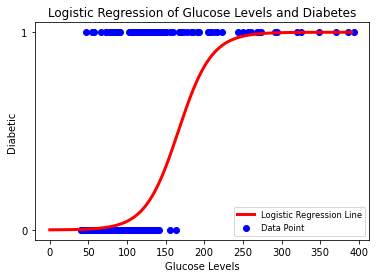

In [ ]:
plt.figure()
plt.clf()
plt.scatter(X_train, y_train, color='blue')

# I got this part from stack overflow
spaced = np.linspace(0, 391, len(glucose)).reshape(-1,1)
loss = expit(spaced * model.coef_ + model.intercept_)
plt.plot(spaced, loss.reshape(-1, 1), color='red', linewidth=3)

plt.xlabel('Glucose Levels')
plt.ylabel('Diabetic')
plt.yticks([0, 1])
plt.title("Logistic Regression of Glucose Levels and Diabetes")
plt.legend(("Logistic Regression Line", "Data Point"), loc="lower right", fontsize='small')

plt.show()

Looking at my regression, it pretty much lines up with what I expected after analyzing the model's performance metrics.  Taking it back into the context of my original question - if there exists a correlation between glucose levels and diabetes (and how strong that correlation is), it would seem there is a massive correlation.  This follows the common sense connection between glucose - the sugar in our blood - and diabetes, a disease which severely inhibits the body's ability to produce adequate sugar levels.  This is the answer I expected, but now I've got some neat data and analysis to back it up.